##### [CRNN] 
- 이미지 입력  ===> 텍스트 출력 알고리즘

- [1] 데이터 준비 <hr>

In [8]:
import string
import matplotlib.pyplot as plt
import glob
import tqdm
from PIL import Image

In [9]:
### 데이터 저장 경로
DATA_DIR = '../data/archive/samples/'
MODEL_DIR = './model/'

import os
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

SELECT_IMG : ../data/archive/samples\226md.png


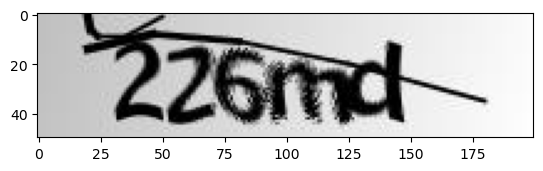

In [10]:
###  이미지 1개 경로 확인
img_file = glob.glob( DATA_DIR+"*.png")[0]  
print(f'SELECT_IMG : {img_file}')

img_file = Image.open(img_file) 
plt.imshow(img_file)
plt.show()

- [2] 데이터 셋 준비 <hr>

- [2-2] 데이터셋 클래스 정의 

In [11]:
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [12]:
# 문자로부터 BOW 생성 함수
def get_BOW(corpus):
   # 공백문자 <pad> => 0으로 설정
   BOW = {"<pad>":0}

   # corpus 문자들을 이용해 BOW에 고유번호 추가
   for letter in corpus:
       if letter not in BOW.keys():
           BOW[letter] = len(BOW.keys())
   return BOW

In [13]:
string.punctuation, string.ascii_letters+string.digits

('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~',
 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')

In [14]:
get_BOW(string.ascii_letters+string.digits)

{'<pad>': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 'A': 27,
 'B': 28,
 'C': 29,
 'D': 30,
 'E': 31,
 'F': 32,
 'G': 33,
 'H': 34,
 'I': 35,
 'J': 36,
 'K': 37,
 'L': 38,
 'M': 39,
 'N': 40,
 'O': 41,
 'P': 42,
 'Q': 43,
 'R': 44,
 'S': 45,
 'T': 46,
 'U': 47,
 'V': 48,
 'W': 49,
 'X': 50,
 'Y': 51,
 'Z': 52,
 '0': 53,
 '1': 54,
 '2': 55,
 '3': 56,
 '4': 57,
 '5': 58,
 '6': 59,
 '7': 60,
 '8': 61,
 '9': 62}

In [15]:
### ==> 데이터셋 클래스 
class Captcha(Dataset):
   def __init__(self, pth, train=True):
       # 소문자와 숫자만 정답으로 이용
       self.corpus = string.ascii_lowercase + string.digits
       self.BOW = get_BOW(self.corpus)

       # 불러올 이미지 파일 경로
       self.imgfiles = glob.glob(pth+"*.png")
       self.imgfiles = [filename.replace("\\", "/") for filename in self.imgfiles ]
       print(f'self.imgfiles => {self.imgfiles}')
       
    
       # 학습 데이터셋 : 테스트 데이터셋 = 80 : 20
       self.train = train
       self.trainset = self.imgfiles[:int(len(self.imgfiles)*0.8)]
       self.testset = self.imgfiles[int(len(self.imgfiles)*0.8):]

   # 문자와 숫자를 고유번호로 치환
   def get_seq(self, line):
       label = []
       for letter in line:
           label.append(self.BOW[letter])
       return label

   def __len__(self):
       if self.train:
           return len(self.trainset)
       else:
           return len(self.testset)

   def __getitem__(self, i):
       if self.train:
           # png파일 >> RGB파일 변환
           data = Image.open(self.trainset[i]).convert("RGB")
           # './data/samples\\226md.png'
           label = self.trainset[i].split("/")[-1]
           
           # 파일이름에서 확장자 제거
           label = label.split(".png")[0]
           
           # 정답 : 문자열을 BOW 순열로 변환
           label = self.get_seq(label)
           
           # 데이터 : ndarray 변환 (H,W,C)
           data = np.array(data).astype(np.float32)
           
           # 파이토치는 채널 가장 앞으로
           data = np.transpose(data, (2, 0, 1))
           label = np.array(label)

           return data, label

       else:
           data = Image.open(self.testset[i]).convert("RGB")
           label = self.testset[i].split("/")[-1]
           label = label.split(".png")[0]
           label = self.get_seq(label)

           data = np.array(data).astype(np.float32)
           label = np.array(label)

           return data, label

In [16]:
ALL_DS = Captcha(pth=DATA_DIR)
len(ALL_DS.trainset), len(ALL_DS.testset)

self.imgfiles => ['../data/archive/samples/226md.png', '../data/archive/samples/22d5n.png', '../data/archive/samples/2356g.png', '../data/archive/samples/23mdg.png', '../data/archive/samples/23n88.png', '../data/archive/samples/243mm.png', '../data/archive/samples/244e2.png', '../data/archive/samples/245y5.png', '../data/archive/samples/24f6w.png', '../data/archive/samples/24pew.png', '../data/archive/samples/25257.png', '../data/archive/samples/253dc.png', '../data/archive/samples/25egp.png', '../data/archive/samples/25m6p.png', '../data/archive/samples/25p2m.png', '../data/archive/samples/25w53.png', '../data/archive/samples/264m5.png', '../data/archive/samples/268g2.png', '../data/archive/samples/28348.png', '../data/archive/samples/28x47.png', '../data/archive/samples/2b827.png', '../data/archive/samples/2bg48.png', '../data/archive/samples/2cegf.png', '../data/archive/samples/2cg58.png', '../data/archive/samples/2cgyx.png', '../data/archive/samples/2en7g.png', '../data/archive/sam

(832, 208)

In [28]:
ALL_DS[0][0].shape, ALL_DS[0][1].shape

((3, 50, 200), (5,))

- [3] 모델 클래스 정의 <hr>

In [17]:
### ==> 모듈 로딩
import torch
import torch.nn as nn
import torch.nn.functional as F

In [18]:
# 3X5 크기의 커널을 이용
class BasicBlock(nn.Module):
   def __init__(self, in_channels, out_channels, kernel_size=(3, 5), stride=(2, 1)):
       super(BasicBlock, self).__init__()

       self.c1 = nn.Conv2d(in_channels=in_channels,
                           out_channels=out_channels,
                           kernel_size=kernel_size,
                           stride=stride)
       
       self.c2 = nn.Conv2d(in_channels=out_channels,
                           out_channels=out_channels,
                           kernel_size=(3, 3), padding=1)

       self.downsample = nn.Conv2d(in_channels=in_channels,
                                   out_channels=out_channels,
                                   kernel_size=kernel_size,
                                   stride=stride)

       self.bn1 = nn.BatchNorm2d(num_features=out_channels)
       self.bn2 = nn.BatchNorm2d(num_features=out_channels)

       self.relu = nn.ReLU()

   def forward(self, x):
       x_ = x
       x = self.c1(x)
       x = self.bn1(x)
       x = self.relu(x)
       x = self.c2(x)
       x = self.bn2(x)

       x_ = self.downsample(x_)

       x += x_
       x = self.relu(x)

       return x

In [19]:
class CRNN(nn.Module):
   def __init__(self, output_size):
       super(CRNN, self).__init__()

       # CNN층 정의
       self.c1 = BasicBlock(in_channels=3, out_channels=64)
       self.c2 = BasicBlock(in_channels=64, out_channels=64)
       self.c3 = BasicBlock(in_channels=64, out_channels=64)
       self.c4 = BasicBlock(in_channels=64, out_channels=64)
       self.c5 = nn.Conv2d(64, 64, kernel_size=(2, 5))

       # 텍스트 정보 추출할 GRU층
       self.gru = nn.GRU(64, 64, batch_first=False)

       # 분류 위한 MLP층
       self.fc1 = nn.Linear(in_features=64, out_features=128)
       self.fc2 = nn.Linear(in_features=128, out_features=output_size) #37(a~z0~9)
       self.relu = nn.ReLU()

   def forward(self, x):
       # 입력텐서의 모양(B, 3, 50, 200)
       x = self.c1(x)
       x = self.c2(x)
       x = self.c3(x)
       x = self.c4(x)
       x = self.c5(x)
       # 특징 추출 후 텐서의 모양(B, 64, 1, 180)
       # (1, 180)이미지 특징맵 데이터 64개 
       
       # (B, K=64, F=180)으로 모양 변경
       x = x.view(x.shape[0], 64, -1)
       
       # (B, F=180, K=64)로 모양 변경
       x = x.permute(2, 0, 1)

       # GRU로 시계열 정보 추출(B, SL, HS)
       x, _ = self.gru(x)
       # X=(SL, B, H), _=(L, B, HS)

       # FC층으로 각 픽셀 분류
       x = self.fc1(x)
       x = self.relu(x)
       x = self.fc2(x)

       # CTC 손실 계산을 위해 로그 소프트맥스를 이용
       x = F.log_softmax(x, dim=-1)

       return x

- [3] 학습 준비 <hr>

In [20]:
from torch.optim.adam import Adam

In [21]:
### 학습 관련 하이퍼파라미터
EPOCHS = 100
BATCH_SIZE = 8

### 실행 디바이스
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

TRAIN_DS = Captcha( pth=DATA_DIR )
LOADER = DataLoader(TRAIN_DS, batch_size=BATCH_SIZE)
print(f'len(TRAIN_DS.BOW)=====>\{len(TRAIN_DS.BOW)}')

MODEL = CRNN(output_size=len(TRAIN_DS.BOW)).to(DEVICE)
print(f'MODEL DESC=====>\{MODEL}')

OPTIMIZER = Adam(MODEL.parameters(), lr=0.0001)

self.imgfiles => ['../data/archive/samples/226md.png', '../data/archive/samples/22d5n.png', '../data/archive/samples/2356g.png', '../data/archive/samples/23mdg.png', '../data/archive/samples/23n88.png', '../data/archive/samples/243mm.png', '../data/archive/samples/244e2.png', '../data/archive/samples/245y5.png', '../data/archive/samples/24f6w.png', '../data/archive/samples/24pew.png', '../data/archive/samples/25257.png', '../data/archive/samples/253dc.png', '../data/archive/samples/25egp.png', '../data/archive/samples/25m6p.png', '../data/archive/samples/25p2m.png', '../data/archive/samples/25w53.png', '../data/archive/samples/264m5.png', '../data/archive/samples/268g2.png', '../data/archive/samples/28348.png', '../data/archive/samples/28x47.png', '../data/archive/samples/2b827.png', '../data/archive/samples/2bg48.png', '../data/archive/samples/2cegf.png', '../data/archive/samples/2cg58.png', '../data/archive/samples/2cgyx.png', '../data/archive/samples/2en7g.png', '../data/archive/sam

In [22]:
### ===> 학습 진행 함수 
def training(model, optim, epochs):
    for epoch in range(200):
        iterator = tqdm.tqdm(LOADER)

        # 정답에 사용할 label
        for data, label in iterator:
            optim.zero_grad()
            preds = model(data.to(DEVICE))  # CRNN의 출력값
            print(f'preds=> {preds.shape}, {preds.ndim}D')
        
            # 시계열 단위 크기 지정 
            print(f'preds.size(0) => {preds.size(0)}')
            preds_size = torch.IntTensor([preds.size(0)] * BATCH_SIZE).to(DEVICE)
            print(f'preds_size=> {preds_size.shape}, {preds_size.ndim}D\n{preds_size}')
            
            # 정답의 모양을 나타내는 변수
            target_len = torch.IntTensor([len(txt) for txt in label]).to(DEVICE)
            print(f'target_len=> {target_len.shape}, {target_len.ndim}D\n {target_len}')

            # 손실 계산
            loss = nn.CTCLoss(blank=0)( preds, label.to(DEVICE), preds_size, target_len)

            # W, b 업데이트  
            loss.backward()   
            optim.step()

            iterator.set_description(f"epoch{epoch+1} loss:{loss.item()}") 
     
    torch.save(model.state_dict(), f"{epoch}_CRNN.pth")
    

In [ ]:
training(MODEL, OPTIMIZER, EPOCHS)

In [ ]:
### ==> 성능 평가 함수 
def testing(model, device):
    model.load_state_dict(torch.load("CRNN.pth", map_location=device))
    model.eval()

    with torch.no_grad():
        TEST_DS = Captcha(pth=DATA_DIR, train=False)
        test_img, label = TEST_DS[0]
        input_tensor = torch.unsqueeze(torch.tensor(test_img), dim=0)
        input_tensor = input_tensor.permute(0, 3, 1, 2).to(device)

        # 가장 높은 확률을 갖는 글자를 추출
        pred = torch.argmax(model(input_tensor), dim=-1)

        # 글자 간의 중복 제거
        prev_letter = pred[0].item()
        pred_word = ""
        for letter in pred:
            if letter.item() != 0 and letter.item() != prev_letter:
                pred_word += list(TEST_DS.BOW.keys())[letter.item()]
            prev_letter = letter.item()

        plt.imshow(test_img)
        plt.title("prediction: "+pred_word)
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


self.imgfiles => ['./data/samples/226md.png', './data/samples/22d5n.png', './data/samples/2356g.png', './data/samples/23mdg.png', './data/samples/23n88.png', './data/samples/243mm.png', './data/samples/244e2.png', './data/samples/245y5.png', './data/samples/24f6w.png', './data/samples/24pew.png', './data/samples/25257.png', './data/samples/253dc.png', './data/samples/25egp.png', './data/samples/25m6p.png', './data/samples/25p2m.png', './data/samples/25w53.png', './data/samples/264m5.png', './data/samples/268g2.png', './data/samples/28348.png', './data/samples/28x47.png', './data/samples/2b827.png', './data/samples/2bg48.png', './data/samples/2cegf.png', './data/samples/2cg58.png', './data/samples/2cgyx.png', './data/samples/2en7g.png', './data/samples/2enf4.png', './data/samples/2fxgd.png', './data/samples/2g783.png', './data/samples/2g7nm.png', './data/samples/2gyb6.png', './data/samples/2mg87.png', './data/samples/2mpnn.png', './data/samples/2n73f.png', './data/samples/2nbcx.png', '.

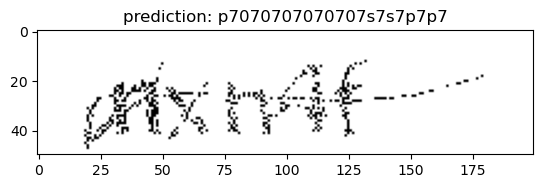

In [ ]:
testing(MODEL, DEVICE)